## Using Pivot table to better master it.

source : https://www.dataquest.io/blog/pandas-pivot-table/

Applying grouping operations with pivot_table on the happiness dataset answering some questions

In [1]:
import pandas as pd
import numpy as np

In [5]:
happy = pd.read_csv('Dataset/happiness.csv',index_col=0)

In [8]:
happy.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'Year'],
      dtype='object')

In [7]:
happy.tail()

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
490,Venezuela,Latin America and Caribbean,82.0,5.250,1.128431,1.431338,0.617144,0.153997,0.064491,0.065020,1.789464,2017
491,Vietnam,Southeastern Asia,94.0,5.074,0.788548,1.277491,0.652169,0.571056,0.087633,0.234968,1.462319,2017
492,Yemen,Middle East and Northern Africa,146.0,3.593,0.591683,0.935382,0.310081,0.249464,0.056767,0.104125,1.345601,2017
493,Zambia,Sub-Saharan Africa,116.0,4.514,0.636407,1.003187,0.257836,0.461603,0.078214,0.249580,1.826705,2017
494,Zimbabwe,Sub-Saharan Africa,138.0,3.875,0.375847,1.083096,0.196764,0.336384,0.095375,0.189143,1.597970,2017


###  Questions :
* which are the happiest and least happy countries and regions in the world ?
* Is happiness affected by region ?
* Did the happiness score change significantly over the past 3 years ?

In [13]:
# sort the df by ascending years and happiness scores
happy.sort_values(['Year','Happiness Score'],ascending=[True,False],inplace=True)
happy.head(10)

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
141,Switzerland,Western Europe,1.0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
60,Iceland,Western Europe,2.0,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
38,Denmark,Western Europe,3.0,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
108,Norway,Western Europe,4.0,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
25,Canada,North America,5.0,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015
46,Finland,Western Europe,6.0,7.406,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955,2015
102,Netherlands,Western Europe,7.0,7.378,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570,2015
140,Sweden,Western Europe,8.0,7.364,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119,2015
103,New Zealand,Australia and New Zealand,9.0,7.286,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425,2015
6,Australia,Australia and New Zealand,10.0,7.284,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646,2015


The country's Happiness Score is calculated by summing the seven other variables in the table

In [17]:
print('Our dataset has {0} rows and {1} columns '.format(happy.shape[0],happy.shape[1]))
print('Are there any missing values : {}'.format(happy.isnull().any().any()))
happy.describe()

Our dataset has 495 rows and 12 columns 
Are there any missing values : True


,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
count,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,495.000000
mean,78.829787,5.370728,0.927830,0.990347,0.579968,0.402828,0.134790,0.242241,2.092717,2016.000000
std,45.281408,1.136998,0.415584,0.318707,0.240161,0.150356,0.111313,0.131543,0.565772,0.817323
min,1.000000,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580,2015.000000
25%,40.000000,4.509000,0.605292,0.793000,0.402301,0.297615,0.059777,0.152831,1.737975,2015.000000
50%,79.000000,5.282500,0.995439,1.025665,0.630053,0.418347,0.099502,0.223140,2.094640,2016.000000
75%,118.000000,6.233750,1.252443,1.228745,0.768298,0.516850,0.173161,0.315824,2.455575,2017.000000
max,158.000000,7.587000,1.870766,1.610574,1.025250,0.669730,0.551910,0.838075,3.837720,2017.000000


## Categorizing the data by <i>Year<i/> and  <i>Region<i/>

In [20]:
#the default aggredation function is : mean()
pd.pivot_table(happy, index='Year', values='Happiness Score')

,Happiness Score
Year,
2015,5.375734
2016,5.382185
2017,5.354019


It basically worked like that :D

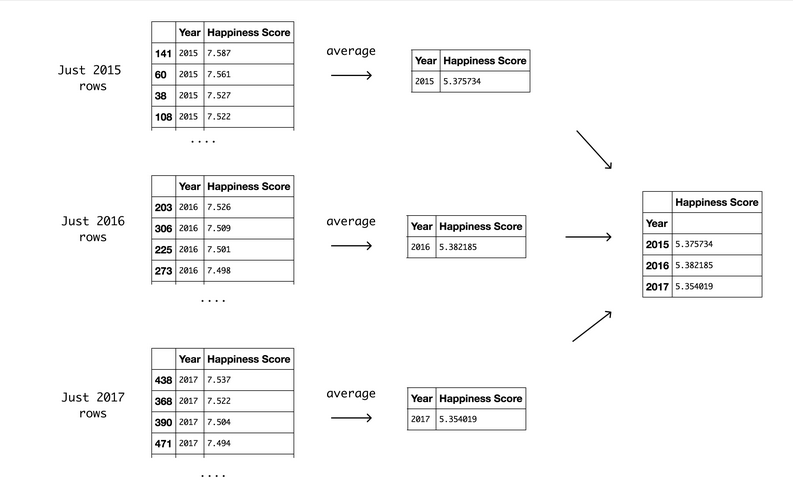

In [22]:
from IPython.display import Image
Image(filename="Happiness_sac.png")

Applying the **Split-Apply-Combine** Concept

- Now we use the **region** column as **index** : 

In [29]:
happy.pivot_table(index='Region', values='Happiness Score').sort_values(by='Happiness Score',ascending=False)

,Happiness Score
Region,
Australia and New Zealand,7.302500
North America,7.227167
Western Europe,6.693000
Latin America and Caribbean,6.069074
Eastern Asia,5.632333
Middle East and Northern Africa,5.387879
Central and Eastern Europe,5.371184
Southeastern Asia,5.364077
Southern Asia,4.590857


## Creating a multi-index pivot table

In [30]:
happy.pivot_table(index=['Region','Year'],values='Happiness Score')

Happiness Score
Region                          Year                 
Australia and New Zealand       2015         7.285000
                                2016         7.323500
                                2017         7.299000
Central and Eastern Europe      2015         5.332931
                                2016         5.370690
                                2017         5.409931
Eastern Asia                    2015         5.626167
                                2016         5.624167
                                2017         5.646667
Latin America and Caribbean     2015         6.144682
                                2016         6.101750
                                2017         5.957818
Middle East and Northern Africa 2015         5.406900
                                2016         5.386053
                                2017         5.369684
North America                   2015         7.273000
                                2016         7.254000
                                2017         7.154500
Southeastern Asia               2015         5.317444
                                2016         5.338889
                                2017         5.444875
Southern Asia                   2015         4.580857
                                2016         4.563286
                                2017         4.628429
Sub-Saharan Africa              2015         4.202800
                                2016         4.136421
                                2017         4.111949
Western Europe                  2015         6.689619
                                2016         6.685667
                                2017         6.703714

- **columns** : using this paratmeter will spread the data horizontally

In [32]:
pd.pivot_table(happy, columns='Year',index='Region', values='Happiness Score')

Year,2015,2016,2017
Region,,,
Australia and New Zealand,7.285000,7.323500,7.299000
Central and Eastern Europe,5.332931,5.370690,5.409931
Eastern Asia,5.626167,5.624167,5.646667
Latin America and Caribbean,6.144682,6.101750,5.957818
Middle East and Northern Africa,5.406900,5.386053,5.369684
North America,7.273000,7.254000,7.154500
Southeastern Asia,5.317444,5.338889,5.444875
Southern Asia,4.580857,4.563286,4.628429
Sub-Saharan Africa,4.202800,4.136421,4.111949


##  Visualizing the pivot table using "plot()"

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

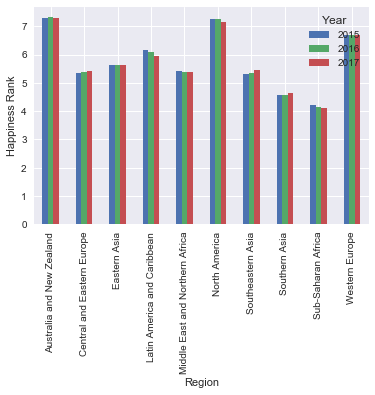

In [39]:
pd.pivot_table(happy, columns='Year',index='Region', values='Happiness Score').plot(kind='bar')
plt.ylabel('Happiness Rank')

## Manipulating the data using "aggfunc"

- **aggfunc** : this parameter let use other aggregates. it accepts a function or a list of functions

In [42]:
pd.pivot_table(happy, index='Region', values='Happiness Score', aggfunc=[np.mean,np.median,min,max,np.std])

,mean,median,min,max,std
,Happiness Score,Happiness Score,Happiness Score,Happiness Score,Happiness Score
Region,,,,,
Australia and New Zealand,7.302500,7.2995,7.284,7.334,0.020936
Central and Eastern Europe,5.371184,5.4010,4.096,6.609,0.578274
Eastern Asia,5.632333,5.6545,4.874,6.422,0.502100
Latin America and Caribbean,6.069074,6.1265,3.603,7.226,0.728157
Middle East and Northern Africa,5.387879,5.3175,3.006,7.278,1.031656
North America,7.227167,7.2175,6.993,7.427,0.179331
Southeastern Asia,5.364077,5.2965,3.819,6.798,0.882637
Southern Asia,4.590857,4.6080,3.360,5.269,0.535978


## Applying a custom function

We can also apply custom functions with the aggregates. In this case, let's calculate the average number of countries in each region in a given year

In [43]:
pd.pivot_table(happy, index='Region', values='Happiness Score', aggfunc=[np.mean,np.median,min,max,np.std,lambda x: x.count()/3])

,mean,median,min,max,std,<lambda>
,Happiness Score,Happiness Score,Happiness Score,Happiness Score,Happiness Score,Happiness Score
Region,,,,,,
Australia and New Zealand,7.302500,7.2995,7.284,7.334,0.020936,2.000000
Central and Eastern Europe,5.371184,5.4010,4.096,6.609,0.578274,29.000000
Eastern Asia,5.632333,5.6545,4.874,6.422,0.502100,6.000000
Latin America and Caribbean,6.069074,6.1265,3.603,7.226,0.728157,22.666667
Middle East and Northern Africa,5.387879,5.3175,3.006,7.278,1.031656,19.333333
North America,7.227167,7.2175,6.993,7.427,0.179331,2.000000
Southeastern Asia,5.364077,5.2965,3.819,6.798,0.882637,8.666667
Southern Asia,4.590857,4.6080,3.360,5.269,0.535978,7.000000


- Take out the outliers by only calculating the values between the 25th and 75th percentile

In [50]:
def remove_outliers(values):
    mid_quantiles = values.quantile([.25,.75])
    return np.mean(mid_quantiles)

pd.pivot_table(happy,index='Region', values='Happiness Score', aggfunc=[np.mean, remove_outliers, lambda x : x.count() / 3])

,mean,remove_outliers,<lambda>
,Happiness Score,Happiness Score,Happiness Score
Region,,,
Australia and New Zealand,7.302500,7.299125,2.000000
Central and Eastern Europe,5.371184,5.449250,29.000000
Eastern Asia,5.632333,5.610125,6.000000
Latin America and Caribbean,6.069074,6.192750,22.666667
Middle East and Northern Africa,5.387879,5.508500,19.333333
North America,7.227167,7.244875,2.000000
Southeastern Asia,5.364077,5.470125,8.666667
Southern Asia,4.590857,4.707500,7.000000


Removing the outliers mostly affected the regions with a higher number of countries

## Categorizing using string manipulation

- Take the results by continents. Looking for region names that contains 'Asia' and 'Europe'. To do so, we assign the pivot table to a variable, then apply the filters.

In [52]:
table = pd.pivot_table(happy, index='Region',values='Happiness Score', aggfunc=[np.mean, remove_outliers])
table[table.index.str.contains('Asia')]

,mean,remove_outliers
,Happiness Score,Happiness Score
Region,,
Eastern Asia,5.632333,5.610125
Southeastern Asia,5.364077,5.470125
Southern Asia,4.590857,4.707500


the result for Europe

In [46]:
table[table.index.str.contains('Europe')]

,mean,remove_ouliers
,Happiness Score,Happiness Score
Region,,
Central and Eastern Europe,5.371184,5.44925
Western Europe,6.693000,6.84650


If you'd like to extract specific values from more than one column, then it's better to use df.query because the previous method won't work for conditioning multi-indexes.

- Specific years, and specific regions in the Africa area

In [53]:
table = pd.pivot_table(happy, index = ['Region', 'Year'], values='Happiness Score',
               aggfunc= [np.mean, remove_outliers])

table.query('Year == [2015, 2017] and Region == ["Sub-Saharan Africa", "Middle East and Northern Africa"]')

mean remove_outliers
                                     Happiness Score Happiness Score
Region                          Year                                
Middle East and Northern Africa 2015        5.406900        5.515875
                                2017        5.369684        5.425500
Sub-Saharan Africa              2015        4.202800        4.168375
                                2017        4.111949        4.118000

## Handling missing data